In [56]:
# default_exp moving_average

# Moving Averages

> Code for Simple Moving Average and Weighted Moving Average.

In [57]:
#hide
from nbdev.showdoc import *

In [58]:
#export
import numpy as np
from numba import jit
import pandas as pd

from time_series_model_basics import simulate_data

## Simple Moving Average

In [59]:
#export
@jit(nopython=True)
def simple(
    ts,
    n=1,
):

    l = len(ts)
    if n > l:
        raise Exception('n should be less than the length of the time-series')

    f = np.zeros((l,))
    f[:n] = np.full(n, np.nan)

    for i in range(l - n + 1):
        f[n + i] = np.mean(ts[i:n + i])
    return f

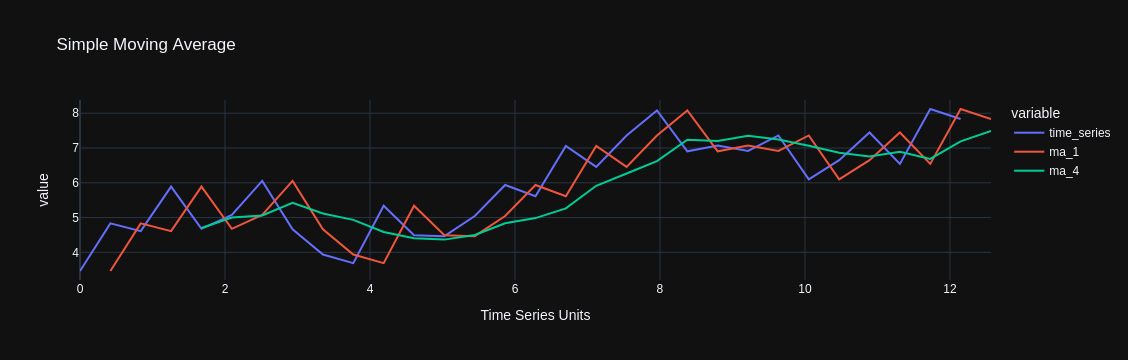

In [60]:
df = simulate_data.pandas_time_series()

ts = df['time_series'].to_numpy()
for n in (1, 4):
    df[f'ma_{n}'] = simple(ts=ts, n=n)

fig = df.plot(
    backend='plotly',
    title=f'Simple Moving Average',
)

fig.update_layout(template="plotly_dark",)

## Weighted Moving Average

In [61]:
a = np.array([1,2])

if type(a) is list:
    print(a)

In [62]:
#export
#@jit(nopython=True)
def weighted(
    ts,
    ws,
):
    if type(ws) is list:
        ws = np.array(ws, dtype=float)

    l = len(ts)
    n = len(ws)
    w = np.sum(ws)

    if n >= l:
        raise Exception('The length of ws should be less than the length of ts')

    f = np.full((l,), np.nan)
    #f[:n] = np.full(n, np.nan)

    for i in range(l - n ):
        f[n + i] = (1 / w) * np.dot(ws, ts[i:n + i])
    return f

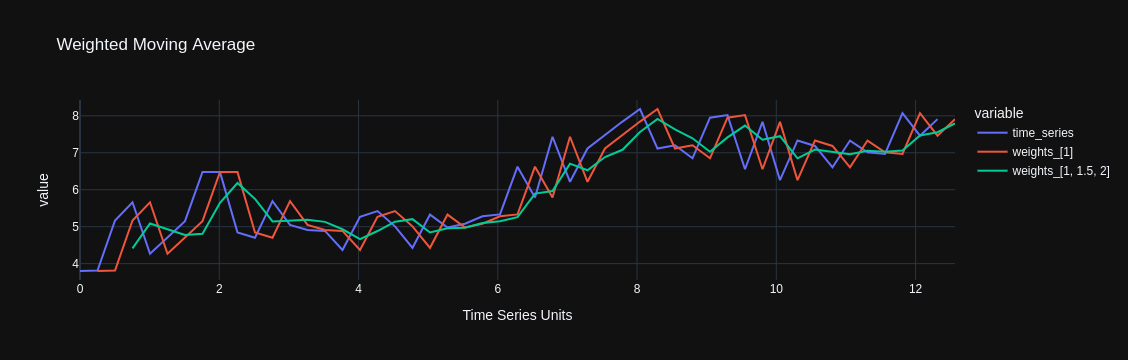

In [63]:
df = simulate_data.pandas_time_series(num_points=50)

ts = df['time_series'].to_numpy()

for ws in ([1], [1, 1.5, 2]):
    #nws = np.array(ws, dtype=float)
    df[f'weights_{ws}'] = weighted(ts=ts, ws=ws)

fig = df.plot(
    backend='plotly',
    title=f'Weighted Moving Average',
)

fig.update_layout(template="plotly_dark",)

## Dataframes and Figures

> Generates a Time Series Dataframe and a Figure Object

> The Values of The Time  Series are Simulated

> Includes Forecasting with Moving Averages 

In [64]:
#export
def __moving_average(
    *args,
    kind='simple',
    df=None,
    ts_col=None,
    **kwargs,
):
    """
    Forescasts  with a Moving Average
    
    -----
    Parameters
    -----
    
    kind : str , default 'simple'. It can be:
    
         'simple' : Simple Moving Average.
         'weighted' : Weighted Moving Average.
    df : DataFrame, default None. If df is None a dataframe
         with simulated data is generated.
    
    ts_col : str, default None. The column name with the 
         time series. Set to 'time_series' when df is None.
    *args : int.  Each value represent a Moving
           Average Forecast and its corresponding
           window size
    **kwargs : passed to __pandas_time_series
    
    -------
    Returns
    -------
    
    tuple: First element is the Pandas Dataframe and the second
           is ploty's figure object
    """

    if len(args) == 0:
        raise Exception("list in *args should include at least one value")

    if kind not in ('simple', 'weighted'):
        raise Exception("Only supported methods are: 'simple', 'weighted'")

    if df is None:
        df = simulate_data.pandas_time_series(**kwargs)
        ts_col = 'time_series'

    if ts_col is None:
        raise Exception('When df is not None, ts_col should be specified')

    ts = df[ts_col].to_numpy()
    cols = [ts_col]
    for a in args:
        col = f'{kind}_{a}'
        cols.append(col)
        if kind == 'simple':
            df[col] = simple(ts=ts, n=a)
        elif kind == 'weighted':
            df[col] = weighted(ts=ts, ws=a)

    fig = df[cols].plot(
        backend='plotly',
        title=f'Simple Moving Average',
    )

    fig.update_layout(template="plotly_dark",)

    return df, fig

In [65]:
#export
def SMA(*args, df=None, ts_col=None, **kwargs):
    """
    Forescasts  with Simple Moving Average
    
    -----
    Parameters
    -----
    
    df : DataFrame, default None. If df is None a dataframe
         with simulated data is generated.
    ts_col : str, default None. The column name with the 
         time series. Set to 'time_series' when df is None.
    *args : int.  Each value represent a Moving
           Average Forecast and its corresponding
           window size
    **kwargs : passed to __pandas_time_series
    
    -------
    Returns
    -------
    
    tuple: First element is the Pandas Dataframe and the second
           is ploty's fig object
    """

    return __moving_average(*args,
                            kind='simple',
                            df=df,
                            ts_col=ts_col,
                            **kwargs)

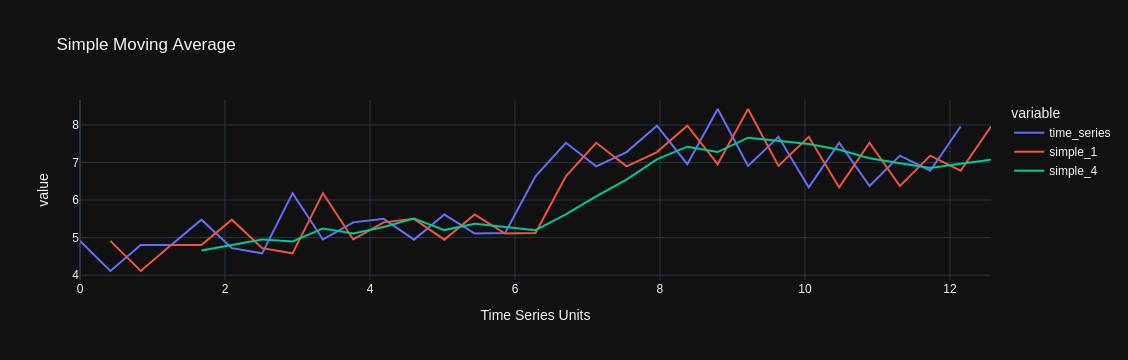

In [66]:
_,fig = SMA(1,4)
fig.show()

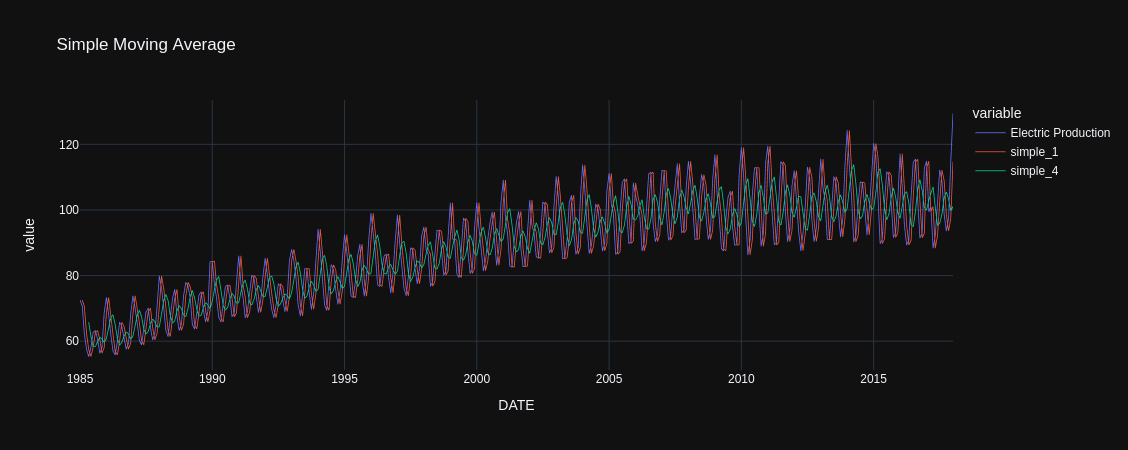

In [67]:
df = pd.read_csv(
    '../data/Electric_Production.csv',
    index_col='DATE',
    parse_dates=['DATE'],
)
ts_col = 'Electric Production'
df.columns = [ts_col]
_, fig = SMA(
    1,
    4,
    df=df,
    ts_col=ts_col,
)
fig.update_layout(
    autosize=False,
    width=1100,
    height=450,
)
fig.update_traces(line=dict(width=0.8))
fig.show()

In [68]:
#export
def WMA(*args, df=None, ts_col='time_series', **kwargs):
    """
    Forescasts with Weighted Moving Average
    
    -----
    Parameters
    -----
    df : DataFrame, default None. If df is None a dataframe
         with simulated data is generated.
    ts_col : str, default 'time_series'. The column name with the 
         time series. Ignored if df is None.
    *args : int.  Each value represent a Moving
           Average Forecast and its corresponding
           window size
    **kwargs : passed to __pandas_time_series
    -------
    Returns
    -------
    tuple: First element is the Pandas Dataframe and the second
           is ploty's fig object
    """

    return __moving_average(*args,
                            kind='weighted',
                            df=df,
                            ts_col=ts_col,
                            **kwargs)

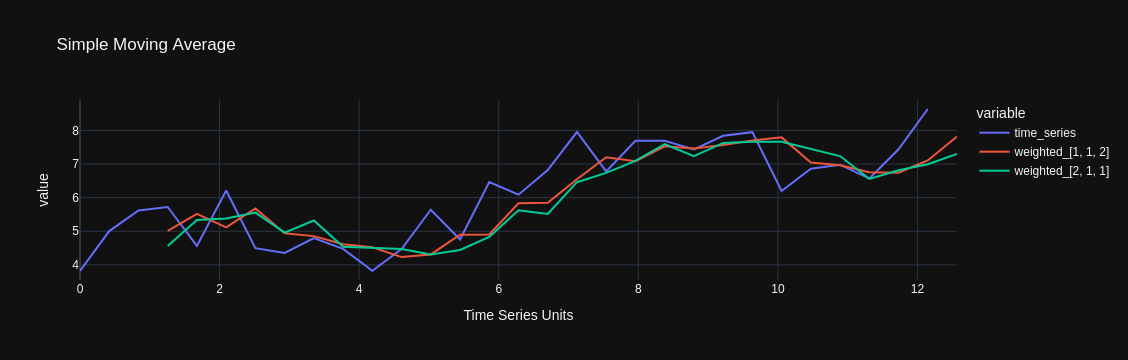

In [69]:
_, fig = WMA([1, 1, 2], [2, 1, 1])
fig.show()

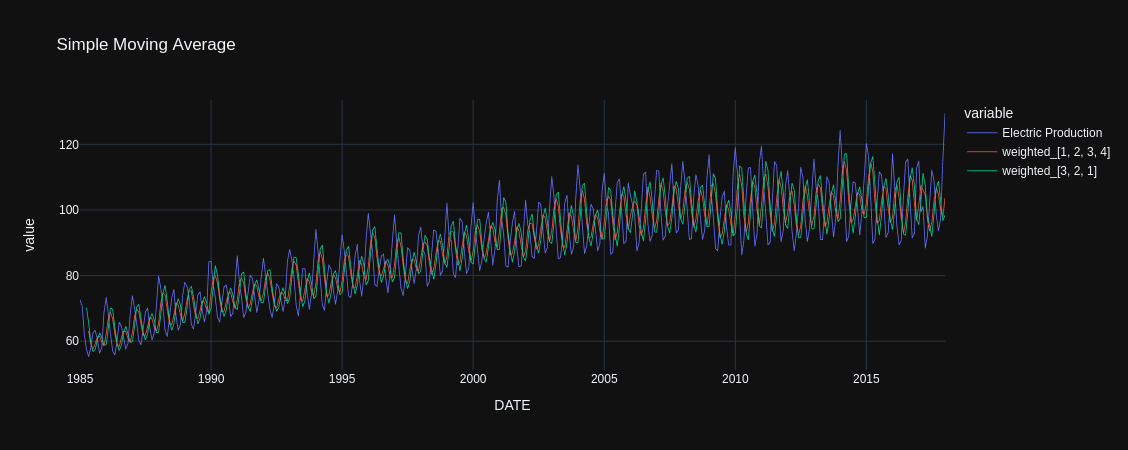

In [70]:
df = pd.read_csv(
    '../data/Electric_Production.csv',
    index_col='DATE',
    parse_dates=['DATE'],
)
ts_col = 'Electric Production'
df.columns = [ts_col]
_, fig = WMA(
    [1, 2, 3, 4],
    [3, 2, 1],
    df=df,
    ts_col=ts_col,
)
fig.update_layout(
    autosize=False,
    width=1100,
    height=450,
)
fig.update_traces(line=dict(width=0.8))
fig.show()